In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;

In [2]:
%matplotlib inline

In [3]:
iris = pd.read_csv("iris.txt", sep=",")
iris.head()

,Canak_yaprak_boyu,Canak_yaprak_eni,Tac_yaprak_boyu,Tac_yaprak_eni,Turu
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<Axes: >

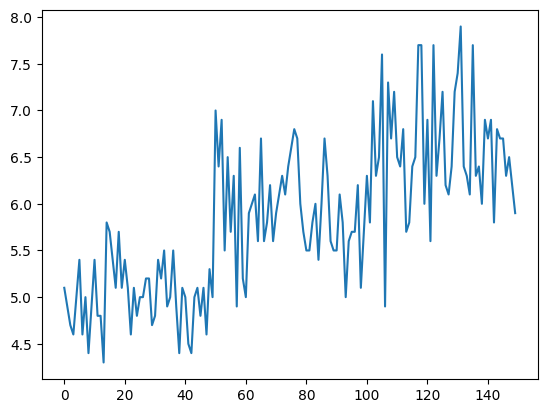

In [4]:
iris.Canak_yaprak_boyu.plot()

<Axes: >

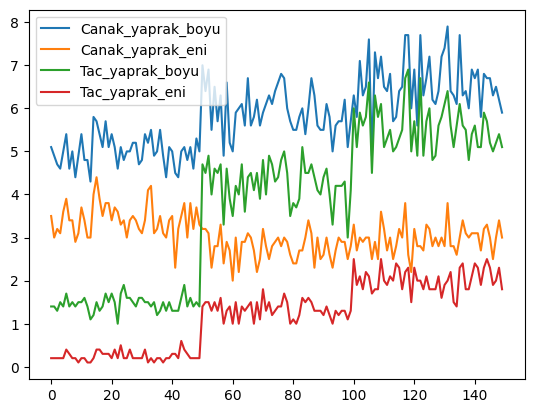

In [5]:
# Veri setinin sayısal sütunlarının çizgi grafiği

iris.plot()

<Axes: >

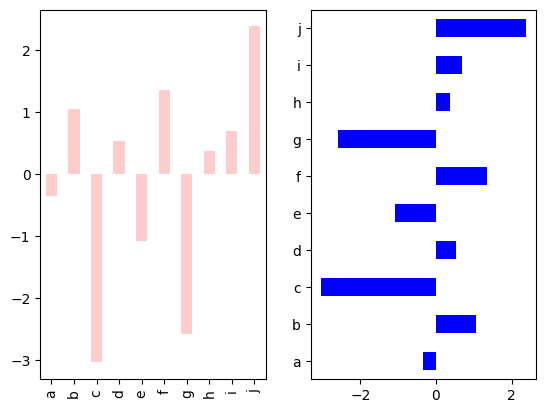

In [6]:
# Bar Grafikler
# Çubukları düşey eksende göstermek için plot.bar
# Çubukları yatay eksende göstermek için plot.barh
# alpha 0 ve 1 arasında değer alır. Transparency belirler.

fig, axes=plt.subplots(1,2)
veri = pd.Series(np.random.randn(10), index = list("abcdefghij"))
veri.plot.bar(ax=axes[0], color="red", alpha=0.2)
veri.plot.barh(ax=axes[1], color="blue", alpha=1)

In [7]:
# abs=absolute kısaltılması

df = pd.DataFrame(abs(np.random.randn(5,3)),
                 index=["bir","iki","uc","dort","bes"],
                 columns=pd.Index(list("ABC")))
df

,A,B,C
bir,1.261474,0.118131,0.511384
iki,1.115446,0.626759,0.335788
uc,0.166974,0.691058,0.562425
dort,0.492024,1.393711,2.023201
bes,0.258423,0.859863,0.014040


<Axes: >

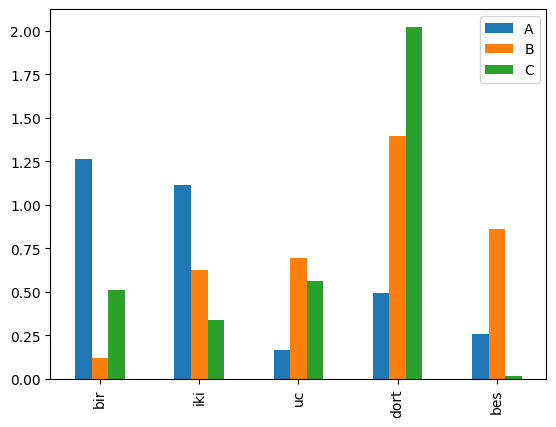

In [8]:
df.plot.bar()

<Axes: >

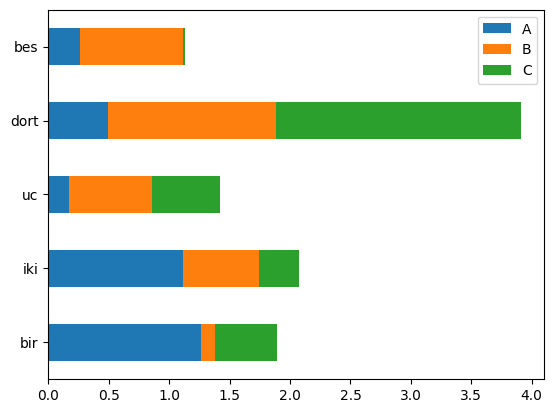

In [9]:
# stacked= değerlerin üst üste binerek gösterilmesini sağlıyor.

df.plot.barh(stacked=True, alpha=1)

In [10]:
import seaborn as sns; # Grafik görselleştirmesinde kullanılan kütüphane

In [11]:
sns.load_dataset("tips")

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [12]:
bahsis = pd.read_csv("tips.txt")
parti_say = pd.crosstab(bahsis["day"],bahsis["size"])
parti_say

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


<Axes: xlabel='day'>

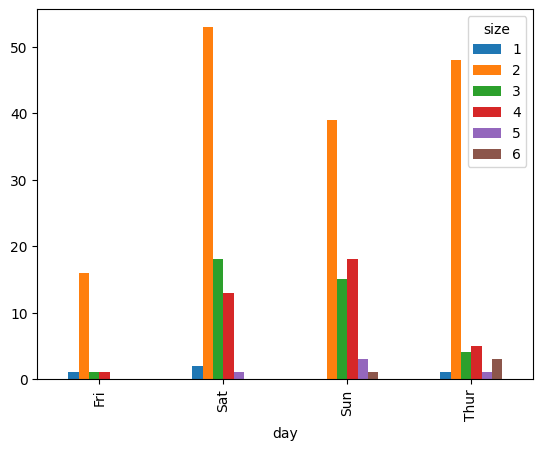

In [13]:
parti_say.plot.bar()

In [14]:
bahsis["bahsis_yuzdesi"] = bahsis["tip"]/(bahsis["total_bill"]-bahsis["tip"])
bahsis

,total_bill,tip,sex,smoker,day,time,size,bahsis_yuzdesi
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,Male,No,Sat,Dinner,2,0.108899


<Axes: xlabel='day', ylabel='bahsis_yuzdesi'>

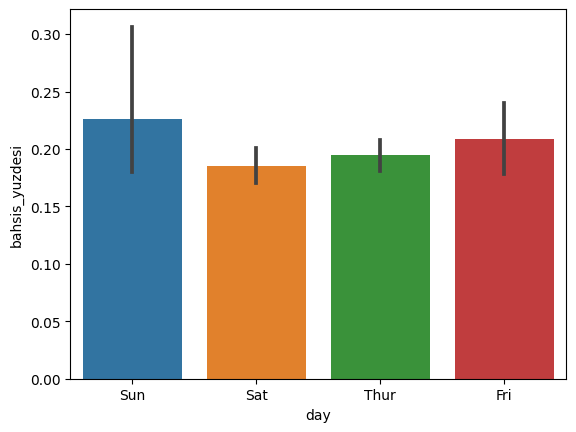

In [15]:
sns.barplot(x="day", y="bahsis_yuzdesi", data=bahsis, orient="v")

<Axes: xlabel='day', ylabel='bahsis_yuzdesi'>

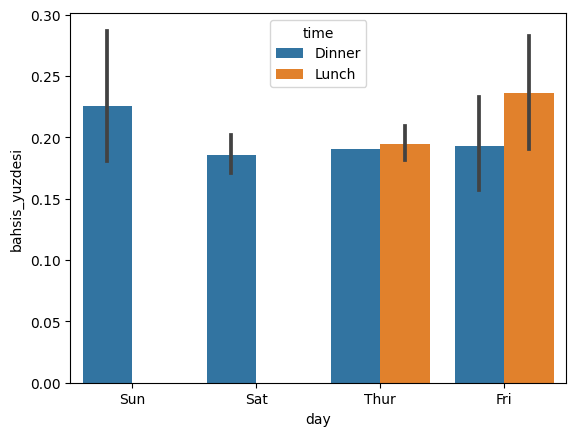

In [16]:
# hue = Grafiğe yeni bir boyut ekliyor. Örnek üzerinden açıklamak gerekirse
#bahsis_yuzdesi ve day ile çizilen grafiğe hue ile time eklenince artık
#bu 3 etkeni bir arada değerlendirerek grafik çiziliyor

sns.barplot(x="day", y="bahsis_yuzdesi", hue="time", data=bahsis, orient="v")

<Axes: ylabel='Frequency'>

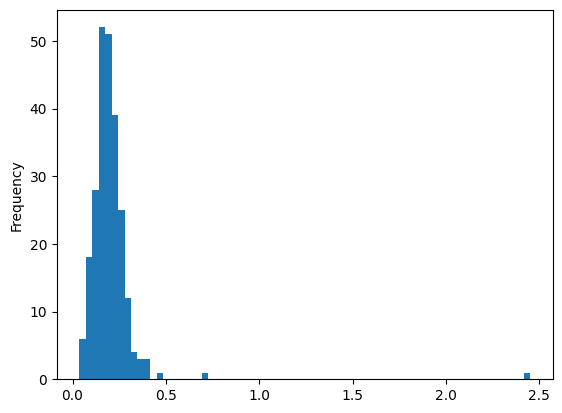

In [17]:
# HISTOGRAM GRAFIK

# Verilerin frekanslarını görebileceğimiz grafik türü

bahsis["bahsis_yuzdesi"].plot.hist(bins=70)

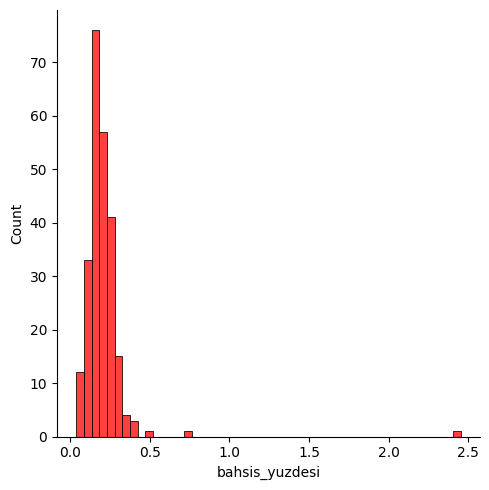

In [18]:
# Histogram grafiğinin yoğunluk eğrisi ile görüntülenmesi için seaborn içersindeki displot() özelliği kullanılır

sns.displot(bahsis["bahsis_yuzdesi"], bins=50, color="red")

<Axes: xlabel='Canak_yaprak_boyu', ylabel='Tac_yaprak_boyu'>

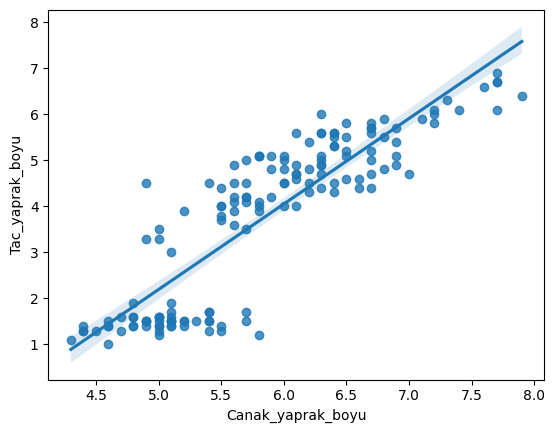

In [19]:
# SAÇILIM GRAFİĞİ
# İki değişken arasındaki ilişkiyi görebilmek için kullanılır

sns.regplot(x="Canak_yaprak_boyu", y="Tac_yaprak_boyu", data=iris)

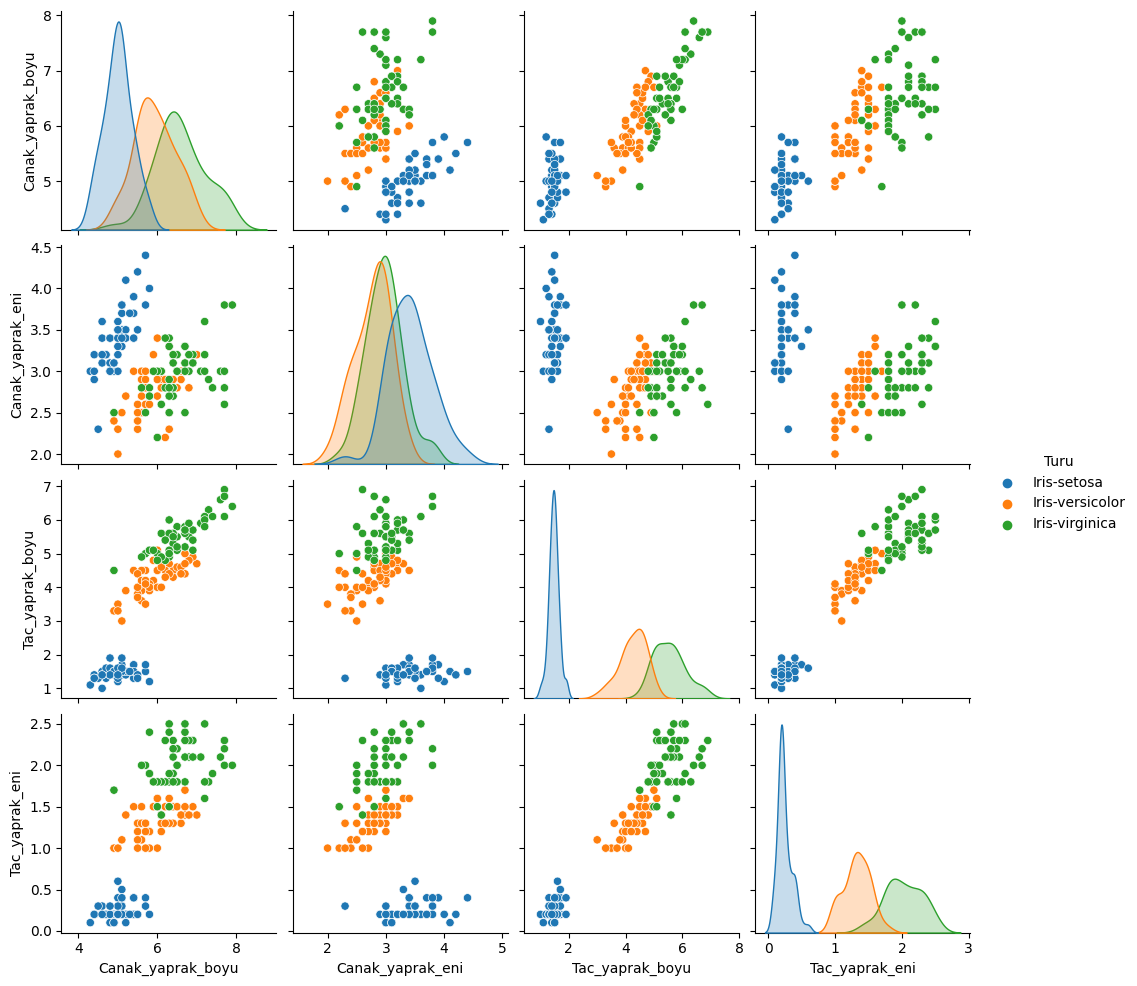

In [20]:
# Tüm ikili ilişkileri görselleştirmek için...

sns.pairplot(iris, hue="Turu")

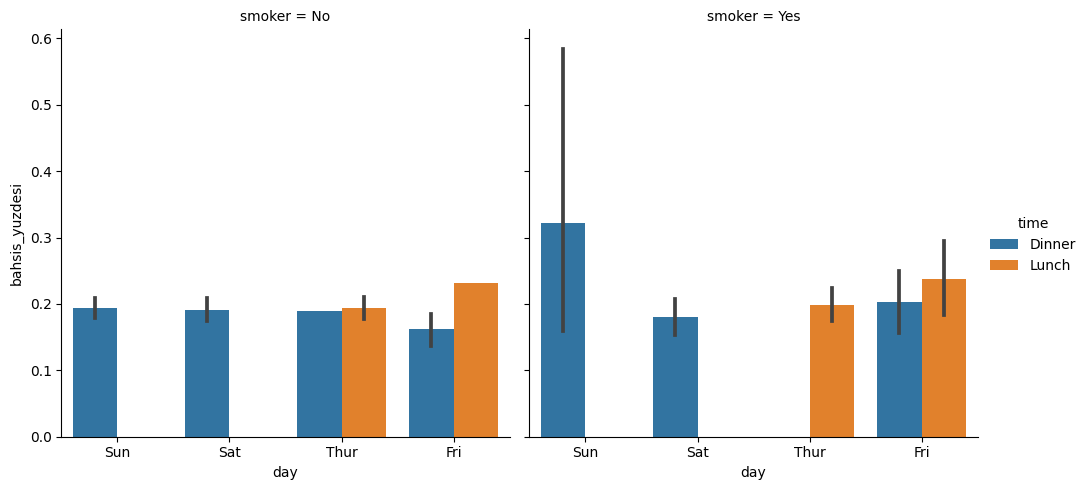

In [21]:
# Birden fazla kategorik değişkenlerin grafik gösterimleri

# Bu örnekte col="smoker" ekleyerek smoker faktörünü de grafik oluştururken kullanmasını istedik
bahsis.head()
sns.catplot(x="day", y="bahsis_yuzdesi", hue="time", col="smoker", kind="bar", data=bahsis)

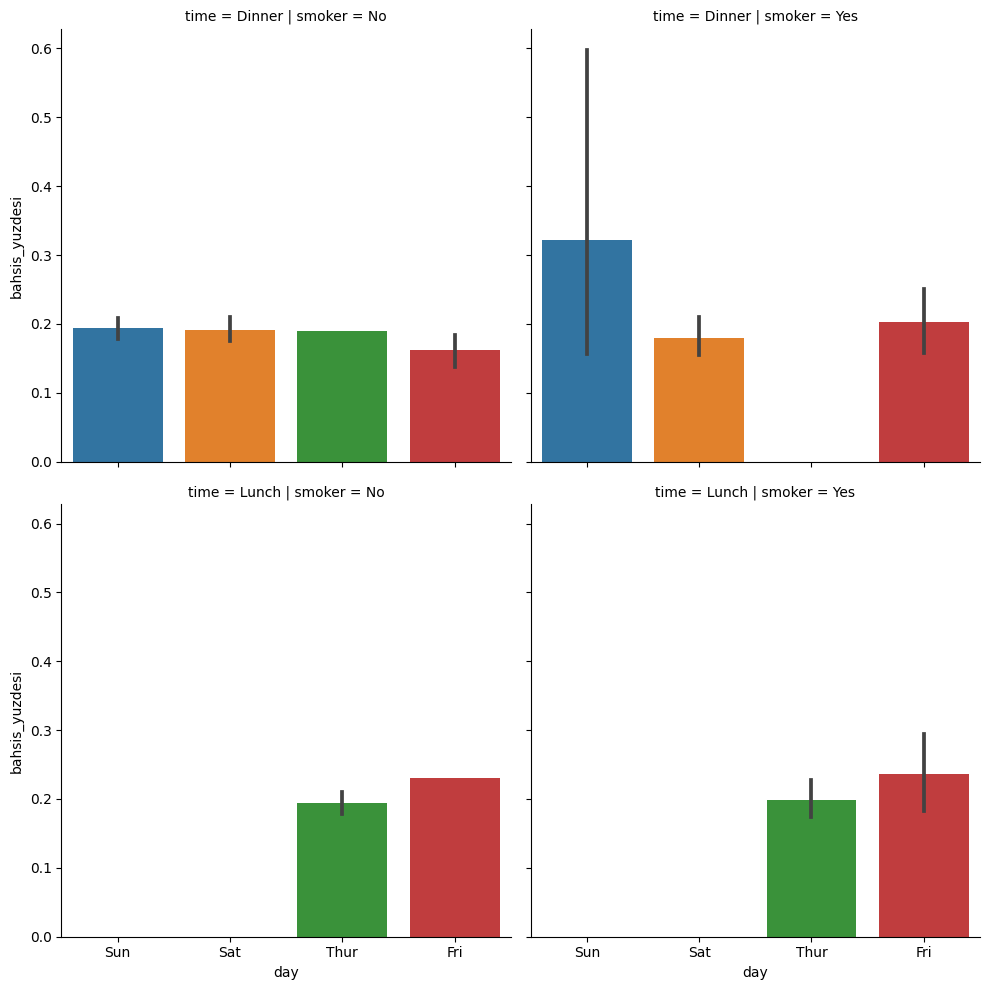

In [22]:
# Zamana göre sigara içen ve içmeyen kişilerin bahşiş yüzdesini görselleştirme

sns.catplot(x="day", y="bahsis_yuzdesi", col="smoker", row="time", kind="bar", data=bahsis)